In [1]:

%load_ext autoreload
%autoreload 2

import sys

sys.path.insert(0, ".")

import math
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.stats import norm
from scipy.special import logsumexp
from scipy.optimize import minimize
import datetime

from scipy.stats import gamma
from sklearn import linear_model
from patsy import dmatrix, cr
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
mutuals_all = ["SPSF.00011", "SPSF.00028", "SPSF.00031", "SPSF.00037", "SPSF.00051", "SPSF.00052", "SPSF.00078", "SPSF.00221", "SPSF.00280", "SPSF.00301", "SPSF.00317", "SPSF.00353", "SPSF.00361", "SPSF.00415", "SPSF.00428", "SPSF.00438", "SPSF.00447", "SPSF.00451", "SPSF.00457", "SPSF.00468", "SPSF.00473", "SPSF.00507", "SPSF.00634", "SPSF.00655", "SPSF.00662", "SPSF.00726", "SPSF.00742", "SPSF.00764", "SPSF.01090", "SPSF.01112", "SPSF.01236", "SPSF.01244", "SPSF.01406", "SPSF.01694", "SPSF.01767", "SPSF.01848", "SPSF.01953", "SPSF.02011", "SPSF.02038", "SPSF.02054", "SPSF.02070", "SPSF.02143", "SPSF.02224", "SPSF.02348", "SPSF.02500", "SPSF.02917", "SPSF.03034", "SPSF.03778", "SPSF.04130", "SPSF.04731", "SPSF.05185", "SPSF.05339", "SPSF.05428", "SPSF.05690", "SPSF.06408", "SPSF.06459", "SPSF.06947", "SPSF.07625", "SPSF.07757", "SPSF.07870", "SPSF.08001", "SPSF.08079", "SPSF.08427", "SPSF.10191", "SPSF.10320", "SPSF.10323", "SPSF.10385", "SPSF.10476", "SPSF.10653", "SPSF.10719", "SPSF.10720", "SPSF.10751", "SPSF.10831", "SPSF.10913", "SPSF.10941", "SPSF.10949", "SPSF.10989", "SPSF.10998", "SPSF.11036", "SPSF.11091", "SPSF.11101", "SPSF.11149", "SPSF.11186", "SPSF.11268", "SPSF.11347", "SPSF.11617", "SPSF.11753", "SPSF.11878", "SPSF.11964", "SPSF.11972", "SPSF.11973", "SPSF.12362", "SPSF.12372", "SPSF.12468", "SPSF.12839", "SPSF.12988", "SPSF.13098", "SPSF.13374", "SPSF.13420", "SPSF.13471", "SPSF.13501", "SPSF.13528", "SPSF.13684", "SPSF.13692", "SPSF.13714", "SPSF.13725", "SPSF.13889", "SPSF.13919", "SPSF.13935", "SPSF.13943", "SPSF.13978", "SPSF.14001", "SPSF.14036", "SPSF.14044", "SPSF.14090", "SPSF.14141", "SPSF.14176", "SPSF.14184", "SPSF.14362", "SPSF.14400", "SPSF.14427", "SPSF.14443", "SPSF.14451", "SPSF.14494", "SPSF.14508", "SPSF.14656", "SPSF.14753", "SPSF.14761", "SPSF.14885", "SPSF.14915", "SPSF.14974", "SPSF.15024", "SPSF.15040", "SPSF.15067", "SPSF.15091", "SPSF.15113", "SPSF.15261", "SPSF.15296", "SPSF.15350", "SPSF.15377", "SPSF.15407", "SPSF.15881", "SPSF.16250", "SPSF.16273", "SPSF.16330", "SPSF.16489", "SPSF.16683", "SPSF.16748", "SPSF.16799", "SPSF.16888", "SPSF.16918", "SPSF.16985", "SPSF.17043", "SPSF.17299", "SPSF.17329", "SPSF.17450", "SPSF.17493", "SPSF.18309", "SPSF.18767", "SPSF.20672", "SPSF.21270", "SPSF.21415", "SPSF.21482", "SPSF.21733", "SPSF.22624", "SPSF.22945", "SPSF.22993", "SPSF.23388", "SPSF.23574", "SPSF.24017", "SPSF.24341", "SPSF.24520", "SPSF.26034", "SPSF.26257", "SPSF.26468", "SPSF.26818", "SPSF.27022", "SPSF.27065", "SPSF.27480", "SPSF.27529", "SPSF.27766", "SPSF.28681", "SPSF.29513", "SPSF.29610", "SPSF.29831", "SPSF.30376", "SPSF.30384", "SPSF.30449", "SPSF.30651", "SPSF.31186", "SPSF.31780", "SPSF.32522", "SPSF.32832", "SPSF.33049", "SPSF.33200", "SPSF.33677", "SPSF.34150", "SPSF.34606", "SPSF.34703", "SPSF.36188", "SPSF.36277", "SPSF.36340", "SPSF.36706", "SPSF.40070", "SPSF.40940", "SPSF.43320", "SPSF.43850", "SPSF.44377", "SPSF.6947A", "SPSF.6947B"]

In [3]:
# read in CSV files from each LOB
reg_combined = None
for l in ["WC", "OO", "CA", "OC"]:
    temp = pd.read_csv(f"{l}_reg.csv")
    reg_combined = pd.concat((reg_combined, temp))

reg_combined["mutual"] = reg_combined.tag.apply(lambda x: 1 if x in mutuals_all else 0)

In [4]:
# combined regression
X = dmatrix("1 + lob + np.log(lob_prem) + np.log(pct_lob)", reg_combined)
y = np.minimum(4, np.log(1 + reg_combined.r_actual))

fit_r = sm.OLS(y, X).fit()
print(fit_r.summary())

                            OLS Regression Results                            
Dep. Variable:               r_actual   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     6.739
Date:                Fri, 20 May 2022   Prob (F-statistic):           6.91e-06
Time:                        10:56:26   Log-Likelihood:                -317.27
No. Observations:                 239   AIC:                             646.5
Df Residuals:                     233   BIC:                             667.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3425      1.152      3.769      0.0

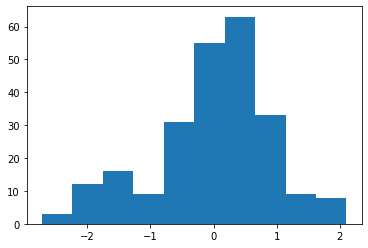

In [5]:
resid = (fit_r.predict(X) - y)
plt.hist(resid)
plt.show()

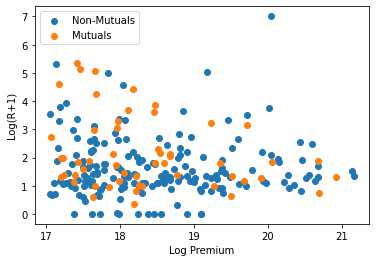

In [6]:
plt.scatter(np.log(reg_combined.lob_prem[reg_combined.mutual == False]), np.log(1 + reg_combined.r_actual[reg_combined.mutual == False]), label="Non-Mutuals")
plt.scatter(np.log(reg_combined.lob_prem[reg_combined.mutual == True]), np.log(1 + reg_combined.r_actual[reg_combined.mutual == True]), label="Mutuals")
plt.legend()
plt.xlabel("Log Premium")
plt.ylabel("Log(R+1)")
plt.show()

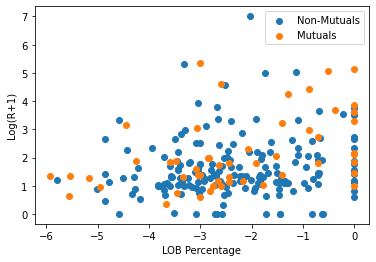

In [7]:
plt.scatter(np.log(reg_combined.pct_lob[reg_combined.mutual == False]), np.log(1 + reg_combined.r_actual[reg_combined.mutual == False]), label="Non-Mutuals")
plt.scatter(np.log(reg_combined.pct_lob[reg_combined.mutual == True]), np.log(1 + reg_combined.r_actual[reg_combined.mutual == True]), label="Mutuals")
plt.legend()
plt.xlabel("LOB Percentage")
plt.ylabel("Log(R+1)")
plt.show()